**Overview**


We are doing a Natural Language Processing Project by doing Sentiment Analysis on Amazon Reviews.
Sentiment Analysis is the use of Natural Language Processing to identify the emotions behind the text.

We are going to use a traditional approach initially to Sentiment Analysis using Python's Natural Language Tool Kit (NLTK). Then we will implement a more complex model called Roberta that is provided by Hugging Face. We will do some analysis of how the different models perform. We will even explore using some pretrained pipelines for making sentiment analysis really quick and easy.

**Basic Outline**

In this notebook we will be doing some sentiment analysis in python using two different techniques:

1. VADER (Valence Aware Dictionary and sEntiment Reasoner) - Bag of words approach
2. Roberta Pretrained Model from Hugging Face

> Step 0: Read-in Data and NLTK basics

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [ ]:
import pandas as pd

# Try to read the file, handling potential errors
try:
    df = pd.read_csv('Reviewsfinal.csv')  # Make sure this line executes successfully
    print("DataFrame 'df' created successfully.")
except pd.errors.ParserError as e:
    print(f"An error occurred while reading the CSV: {e}")
    # Print the lines around the problematic row
    with open('Reviewsfinal.csv', 'r') as file:
        lines = file.readlines()
        for i in range(73043, 73053):  # Print lines around row 73048
            if i < len(lines):
                print(f"Line {i+1}: {lines[i]}")

# Now you should be able to access df.shape
df.shape

DataFrame 'df' created successfully.


(69368, 10)

In [ ]:
df = df.head(3000)

In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...




Quick EDA



In [ ]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

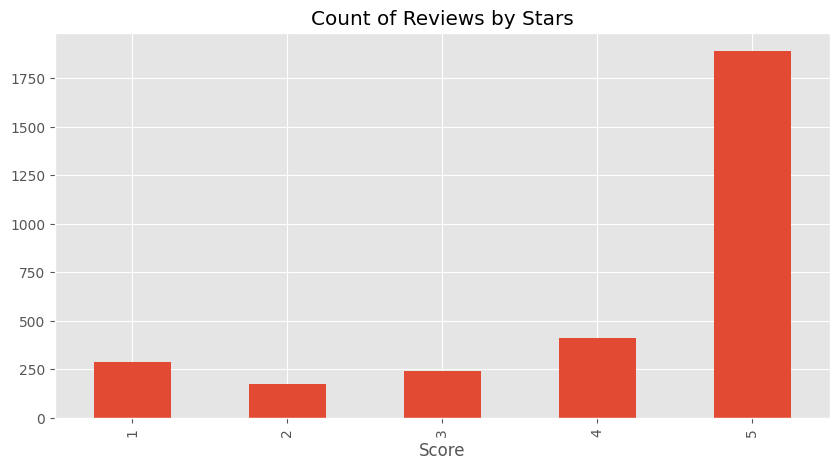

In [ ]:
df['Score'].value_counts().sort_index().plot(kind='bar', title='Count of Reviews by Stars',figsize=(10, 5))
plt.show()

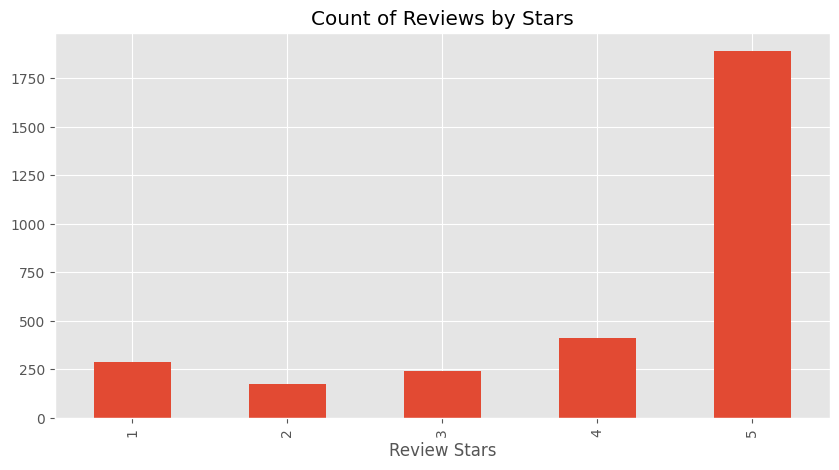

In [ ]:
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

**Basic NLTK stuff**


In [ ]:
example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [ ]:
import nltk
nltk.download('punkt')
tokens = nltk.word_tokenize(example)
print(tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft', ',', 'I', 'do', "n't", 'like', 'it', '.', 'Quaker', 'Oats', 'is', 'the', 'way', 'to', 'go', '.']


In [ ]:
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [ ]:
nltk.download('averaged_perceptron_tagger')
nltk.pos_tag(tokens)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ'),
 (',', ','),
 ('I', 'PRP'),
 ('do', 'VBP'),
 ("n't", 'RB'),
 ('like', 'VB'),
 ('it', 'PRP'),
 ('.', '.'),
 ('Quaker', 'NNP'),
 ('Oats', 'NNPS'),
 ('is', 'VBZ'),
 ('the', 'DT'),
 ('way', 'NN'),
 ('to', 'TO'),
 ('go', 'VB'),
 ('.', '.')]

ADJ:	adjective	new, good, high, special, big, local

ADP:	adposition	on, of, at, with, by, into, under

ADV:	adverb	really, already, still, early, now

CONJ:	conjunction	and, or, but, if, while, although

DET:	determiner, article	the, a, some, most, every, no, which

NOUN:	noun	year, home, costs, time, Africa

NUM:	numeral	twenty-four, fourth, 1991, 14:24

PRT:	particle	at, on, out, over per, that, up, with

PRON:	pronoun	he, their, her, its, my, I, us

VERB:	verb	is, say, told, given, playing, would

punctuation marks:	. , ; !

X:	other	ersatz, esprit, dunno, gr8, univeristy

CC: coordinating conjunction

CD: cardinal digit

DT: determiner

EX: existential there (like: “there is” … think of it like “there exists”)

FW: foreign word

IN: preposition/subordinating conjunction

JJ: adjective – ‘big’     JJR: adjective, comparative – ‘bigger’     JJS: adjective, superlative – ‘biggest’

LS: list marker 1

MD: modal – could, will

NN: noun, singular ‘- desk’     NNS: noun plural – ‘desks’     NNP: proper noun, singular – ‘Harrison’     NNPS: proper noun, plural – ‘Americans’

PDT: predeterminer – ‘all the kids’

POS: possessive ending parent’s

PRP: personal pronoun –  I, he, she     PRP$: possessive pronoun – my, his, hers     

RB: adverb – very, silently,     RBR: adverb, comparative – better     RBS: adverb, superlative – best

RP: particle – give up

TO: – to go ‘to’ the store.

UH: interjection – errrrrrrrm

VB: verb, base form – take     VBD: verb, past tense – took     VBG: verb, gerund/present participle – taking     VBN: verb, past participle – taken     VBP: verb, sing. present, non-3d – take     VBZ: verb, 3rd person sing. present – takes

WDT: wh-determiner – which     WP: wh-pronoun – who, what     WP$: possessive wh-pronoun, eg- whose     WRB: wh-adverb, eg- where, when

In [ ]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [ ]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
#use nltk's currently recommended nameed entity chunker to chunk the given list of tagged tokens
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)




> Step 1: VADER Sentiment Scoring



We will use NLTK's SentimentIntensityAnalyser to get the neg/neu/pos scores of the text.

*   This uses a "bag of words"

    1.   Stop words are removed
    2.   Each word is scored and combined to a total score



```
This approach does not account for relationships between words which in human speech is very important.
```


In [ ]:
nltk.download('vader_lexicon')
# stop words are words like and, the which do not have any positive or negative
# feeling associated with them
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
#tqdm is just a progress bar tracker when we are working on loops on this data

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
sia.polarity_scores('I am so happy')
#mostly positive

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [ ]:
sia.polarity_scores('This is the worst thing ever.')
#mostly negative
#compound is positive : negative ka ratio

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [ ]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [ ]:
#run the polarity score on the entire dataset
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
df['Text'].fillna('', inplace=True)  # Replace missing values with empty strings

res = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
  text = row['Text']
  myid = row['Id']
  res[myid] = sia.polarity_scores(text)

  0%|          | 0/3000 [00:00<?, ?it/s]

In [ ]:
res

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [ ]:
#now we havt the sentiment scores and the metadata
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...


**Plot VADER Results**

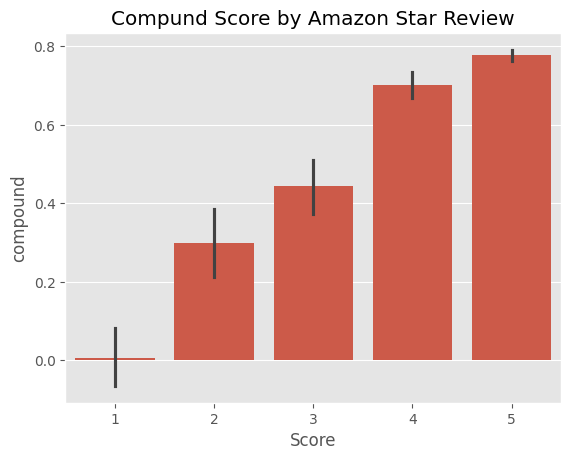

In [ ]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

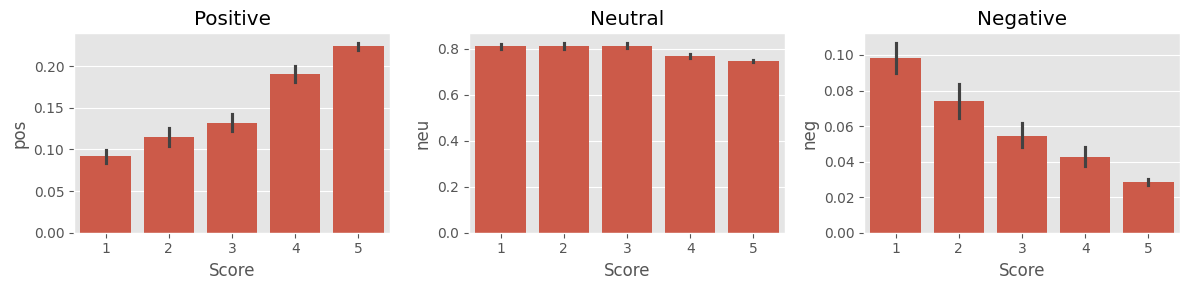

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(12,3))
sns.barplot(data=vaders, x='Score', y='pos', ax = axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax = axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax = axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()



> Step 2: Roberta Pretrained Model


*   Use a model trained of a large corpus of data
*   Transformer model accounts for the words but also the context related to the words

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
#VADER results on example
print(example)
sia.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [ ]:
#Run for Roberta model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687465, 'roberta_pos': 0.0029573692}


In [ ]:
def polarity_scores_roberta(example):
  encoded_text = tokenizer(example, return_tensors='pt')
  output = model(**encoded_text)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  scores_dict = {
      'roberta_neg' : scores[0],
      'roberta_neu' : scores[1],
      'roberta_pos' : scores[2]
  }
  return scores_dict

In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
  try:
    text = row['Text']
    myid = row['Id']
    vader_result = sia.polarity_scores(text)
    vader_result_rename = {}
    for key, value in vader_result.items():
      vader_result_rename[f"vader_{key}"] = value
    roberta_result = polarity_scores_roberta(text)
    both = {**vader_result_rename, **roberta_result}
    res[myid] = both
  except RuntimeError:
    print(f'Broke for id {myid}')

  0%|          | 0/3000 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187
Broke for id 529
Broke for id 540
Broke for id 746
Broke for id 863
Broke for id 1053
Broke for id 1070
Broke for id 1156
Broke for id 1321
Broke for id 1375
Broke for id 1498
Broke for id 1575
Broke for id 1796
Broke for id 1826
Broke for id 2169
Broke for id 2248
Broke for id 2476
Broke for id 2492
Broke for id 2584
Broke for id 2610
Broke for id 2897
Broke for id 2898
Broke for id 2902
Broke for id 2928
Broke for id 2942
Broke for id 2944
Broke for id 2947
Broke for id 2948


In [ ]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [ ]:
results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...


**Compare Scores between Models**

In [ ]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')



> Step 3: Combine and Compare



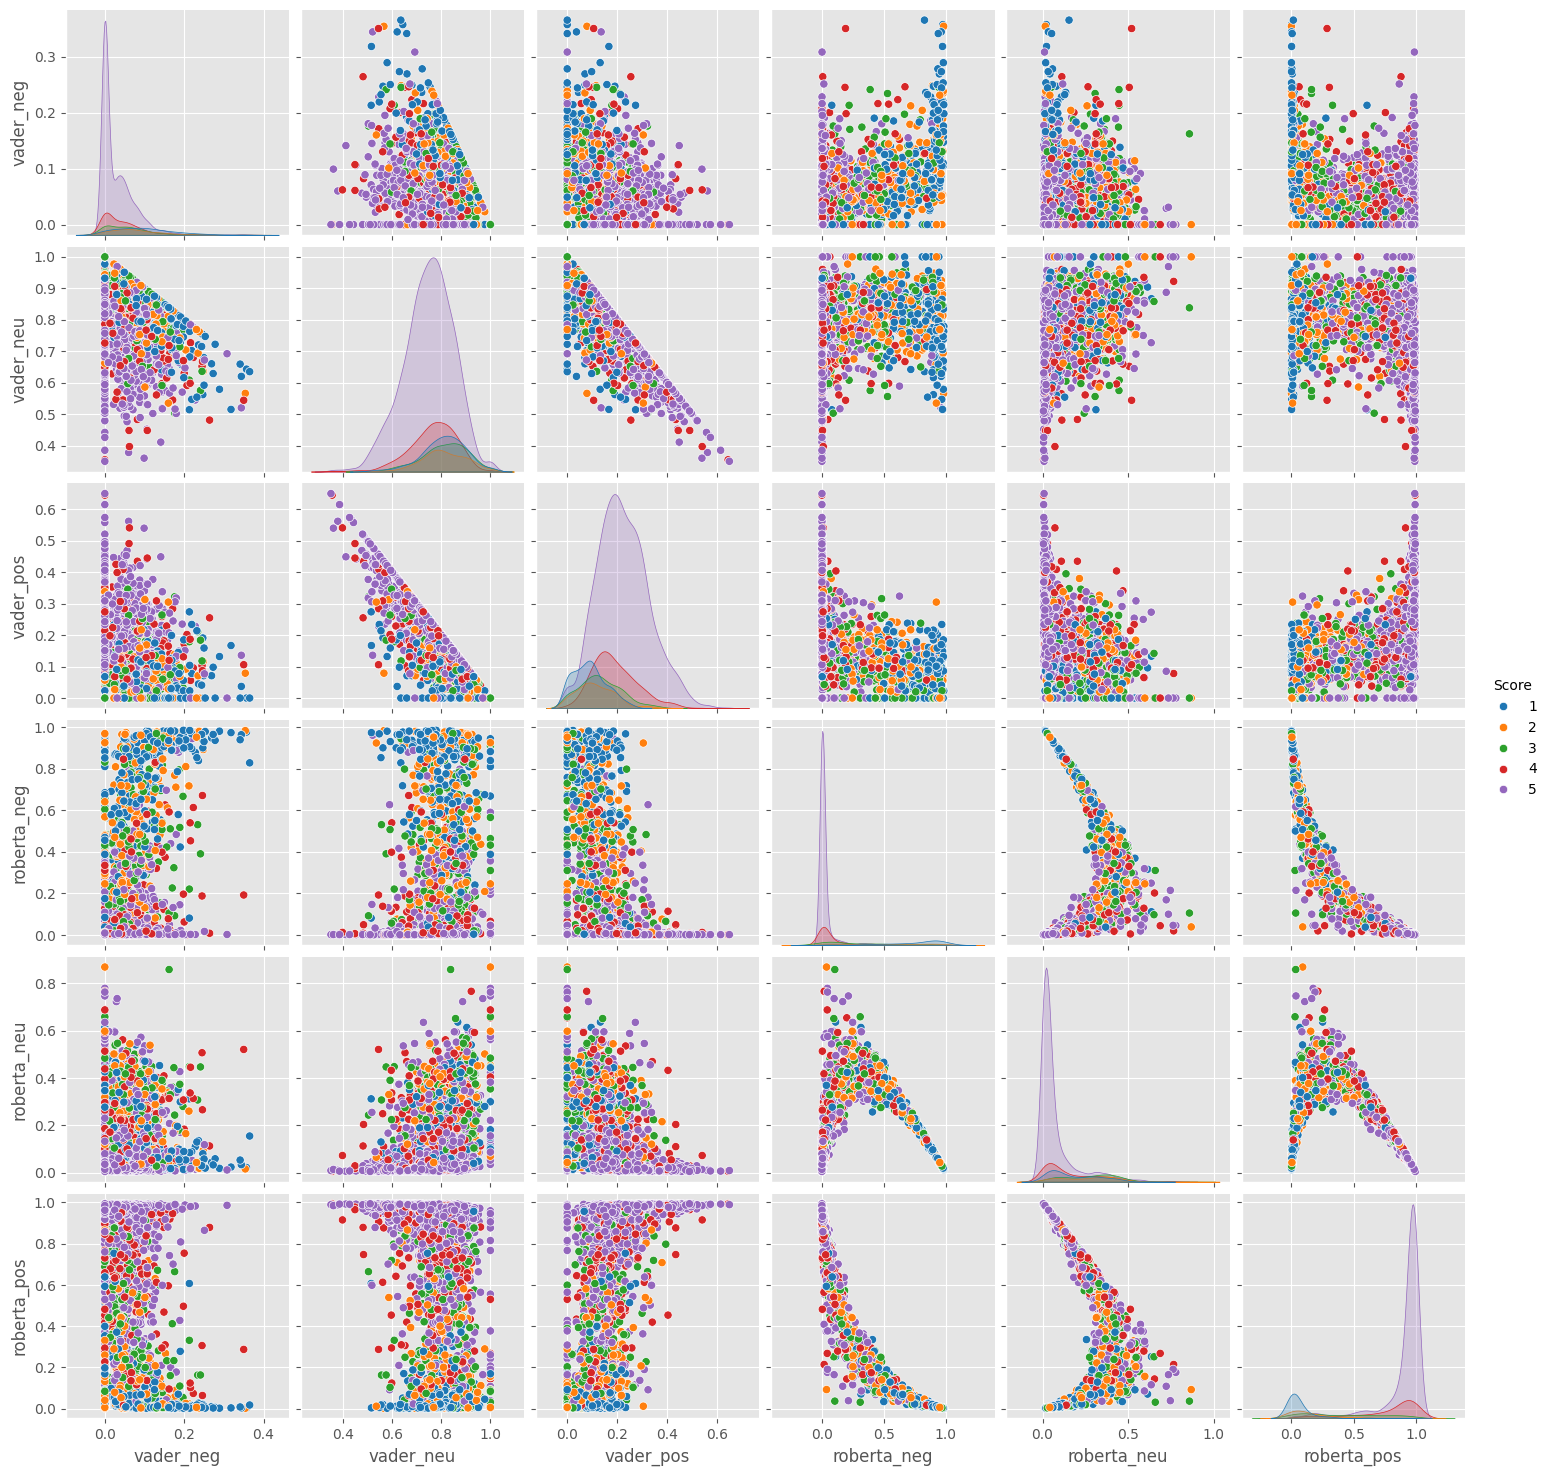

In [ ]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
             hue='Score',
             palette='tab10')
plt.show()



> Step 4: Review *Examples*




Positive 1-Star or negative 5-Star Reviews

Lets look at some examples where the model scoring and the revieew score differ the most.

In [ ]:
#a test that is said to be positive by the model but is actually one score by the reviewer
results_df.query('Score == 1').sort_values('roberta_pos', ascending=False)['Text'].values[0]

'I got two Teas and one type of iced coffe and the rest were HOLIDAY COFFEES and APPLE CIDER!  Spicy Eggnog? Gingerbread? Bait and swtich.  The only redeeming factor - Amazon was great and issued me a refund.'

In [ ]:
results_df.query('Score == 1').sort_values('vader_pos', ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [ ]:
#negative sentiment 5 star reviews
results_df.query('Score == 5').sort_values('roberta_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [ ]:
results_df.query('Score == 5').sort_values('vader_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

Calculate accuracy of both the models

In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(results_df, test_size=0.2, random_state=42) # Adjust test_size as needed

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Define the function to convert VADER scores to labels
def convert_vader_to_label(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Assuming you have a function to convert VADER scores to labels:
vader_predictions = [convert_vader_to_label(score) for score in train_df['vader_compound']]

# Convert numerical scores in 'Score' column to string labels
def convert_score_to_label(score):
    if score >= 4:
        return 'positive'
    elif score <= 2:
        return 'negative'
    else:
        return 'neutral'

true_labels = train_df['Score'].apply(convert_score_to_label) # Convert true labels to strings

vader_accuracy = accuracy_score(true_labels, vader_predictions)
print("VADER Accuracy:", vader_accuracy)
print(classification_report(true_labels, vader_predictions))

VADER Accuracy: 0.8013468013468014
              precision    recall  f1-score   support

    negative       0.61      0.44      0.51       359
     neutral       0.15      0.05      0.07       191
    positive       0.84      0.95      0.89      1826

    accuracy                           0.80      2376
   macro avg       0.53      0.48      0.49      2376
weighted avg       0.75      0.80      0.77      2376



In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Define the function to convert Roberta scores to labels
def convert_roberta_to_label(scores):
    neg, neu, pos = scores # unpack scores
    if neg > neu and neg > pos:
        return 'negative'
    elif pos > neu and pos > neg:
        return 'positive'
    else:
        return 'neutral'

# Assuming you have a function to convert Roberta scores to labels:
roberta_predictions = [convert_roberta_to_label(scores) for scores in train_df[['roberta_neg', 'roberta_neu', 'roberta_pos']].values]

roberta_accuracy = accuracy_score(true_labels, roberta_predictions)
print("Roberta Accuracy:", roberta_accuracy)
print(classification_report(true_labels, roberta_predictions))

Roberta Accuracy: 0.8535353535353535
              precision    recall  f1-score   support

    negative       0.73      0.78      0.75       359
     neutral       0.26      0.22      0.24       191
    positive       0.93      0.93      0.93      1826

    accuracy                           0.85      2376
   macro avg       0.64      0.64      0.64      2376
weighted avg       0.85      0.85      0.85      2376

